month
1949-01-01    112.0
1949-02-01    118.0
1949-03-01    132.0
1949-04-01    129.0
1949-05-01    121.0
Name: sales, dtype: float64


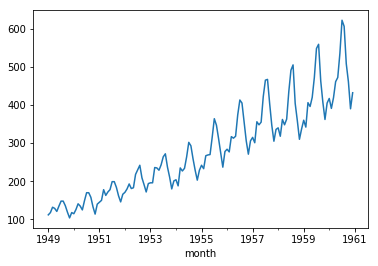

In [2]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
 
def parser(x):
    return datetime.strptime('19'+x, '%Y-%m')
 
series = read_csv('air1.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
print(series.head())
series.plot()
pyplot.show()

C:\Users\ranbix\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  


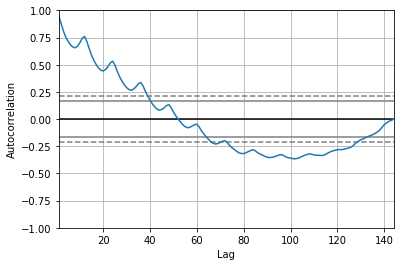

In [4]:
from pandas.tools.plotting import autocorrelation_plot
autocorrelation_plot(series)
pyplot.show()

In [5]:
split_point = len(series) - 7
dataset, validation = series[0:split_point], series[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv')
validation.to_csv('validation.csv')

Dataset 137, Validation 7


In [11]:

from pandas import Series
from statsmodels.tsa.arima_model import ARIMA
import numpy
# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return numpy.array(diff)


# seasonal difference
X = series.values
month_in_year = 12
differenced = difference(X, month_in_year)
# fit model
model = ARIMA(differenced, order=(10,0,4))
model_fit = model.fit(disp=0)
# print summary of fit model
print(model_fit.summary())


C:\Users\ranbix\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\ranbix\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
C:\Users\ranbix\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\ranbix\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:496: Conv

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  132
Model:                    ARMA(10, 4)   Log Likelihood                -496.074
Method:                       css-mle   S.D. of innovations              9.982
Date:                Tue, 02 Oct 2018   AIC                           1024.147
Time:                        14:25:24   BIC                           1070.272
Sample:                             0   HQIC                          1042.890
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.4937      4.438      7.096      0.000      22.795      40.192
ar.L1.y        0.0936      0.330      0.284      0.777      -0.553       0.740
ar.L2.y        0.1180      0.102      1.160      0.2